In [1]:
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
def load_csv_file(file_path):
    data = []

    with open(file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)

        for row in csv_reader:
            data.append(row)

    return data

In [3]:
def load_csv_files_in_folder(folder_path):
    csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
    all_csv_data = []

    for csv_file in csv_files:
        csv_path = os.path.join(folder_path, csv_file)
        csv_data = load_csv_file(csv_path)
        all_csv_data.append((csv_file, csv_data))

    return all_csv_data

In [4]:
def extract_YT_A_data(data, keyword):
    new_data = []
    
    for row in data:
        if keyword in row:
            new_data.append(row)
    
    return new_data

In [8]:
def create_YT_A_Data(_keyword, _variance_all_csv_data):
    _data_list = []
    
    for csv_file, csv_data in _variance_all_csv_data:
        
        _extract_YT_A_data = extract_YT_A_data(csv_data, _keyword)

        # Extract the number after the first occurrence of "Truck"
        match  = re.search(r"Truck_(\d+)", csv_file)
        if match:
            truck_number = match.group(1)
            # prev 없을 때
            if truck_number == "1":
                truck_number = "0"
            # print("prev Truck Number:", truck_number)
            # print(f"Extracted data from {csv_file} where '{_keyword}' exists:")
            for row in _extract_YT_A_data:
                print(row)
                new_row = row + [truck_number] 
                _data_list.append(new_row)
            # print("=" * 80)
            
        else:
            print("Truck number not found.")
            
    original_column_names = _variance_all_csv_data[0][1][0]
    _column_names = [column.strip() for column in original_column_names] + ['prev YT Num']        
    
    return _data_list, _column_names

In [7]:
def plot(_x_values, _y_values, _title_name):
    plt.figure(figsize=(5,3))
    plt.plot(_x_values, _y_values , marker='o', linestyle='-', color = 'navy')
    plt.title(_title_name, fontsize=9, ha='center')

    plt.yticks(range(0, int(_y_values.max()) + 200, 200))
    # plt.xticks(range(0, x_values.max() + 10, 10))

    plt.grid(True)
    plt.show()

### JH_LP_40_50_10

In [9]:
folder_name = 'variance_LP_jh'
variance_all_csv_data = load_csv_files_in_folder(folder_name)

# Printing the loaded CSV data for each file
keyword = "Truck-100"

YT_A_LP_data_jh, column_names = create_YT_A_Data(keyword, variance_all_csv_data)

['Truck-100', 'Route-100', '(175.0 0.0 155.5)', '(625.0 0.0 50.0)', '395.092', '61.388', '32.692']
['Truck-100', 'Route-100', '(175.0 0.0 155.5)', '(625.0 0.0 50.0)', '402.972', '66.388', '35.572']
['Truck-100', 'Route-100', '(175.0 0.0 155.5)', '(625.0 0.0 50.0)', '432.584', '95.928', '35.636']
['Truck-100', 'Route-100', '(175.0 0.0 155.5)', '(625.0 0.0 50.0)', '426.584', '90.26', '35.312']
['Truck-100', 'Route-100', '(175.0 0.0 155.5)', '(625.0 0.0 50.0)', '493.384', '156.884', '35.492']
['Truck-100', 'Route-100', '(175.0 0.0 155.5)', '(625.0 0.0 50.0)', '445.48', '109.092', '35.388']
['Truck-100', 'Route-100', '(175.0 0.0 155.5)', '(625.0 0.0 50.0)', '534.252', '198.256', '34.996']
['Truck-100', 'Route-100', '(175.0 0.0 155.5)', '(625.0 0.0 50.0)', '540.036', '198.184', '38.304']


In [11]:
YT_A_LP_data_jh_df = pd.DataFrame(YT_A_LP_data_jh, columns = column_names)
YT_A_LP_data_jh_df['Total Time'] = YT_A_LP_data_jh_df['Total Time'].astype(float)
YT_A_LP_data_jh_df

,Truck_id,Route_id,Origin,Destination,Total Time,PickupSta AT,DropSta AT,prev YT Num
0,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),395.092,61.388,32.692,0
1,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),402.972,66.388,35.572,10
2,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),432.584,95.928,35.636,20
3,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),426.584,90.26,35.312,30
4,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),493.384,156.884,35.492,40
5,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),445.480,109.092,35.388,50
6,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),534.252,198.256,34.996,60
7,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),540.036,198.184,38.304,70


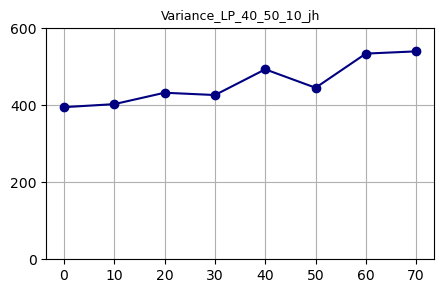

In [12]:
x_value = YT_A_LP_data_jh_df['prev YT Num']
y_value = YT_A_LP_data_jh_df['Total Time']

plot(x_value, y_value, "Variance_LP_40_50_10_jh")

### variance_shortest_hg

In [144]:
# Printing the loaded CSV data for each file
folder_name = 'variance_shortest_hg'
variance_all_csv_data = load_csv_files_in_folder(folder_name)

# Printing the loaded CSV data for each file
keyword = "Truck-100"
YT_A_shortest_data = []

for csv_file, csv_data in variance_all_csv_data:
    
    data = extract_YT_A_data(csv_data, keyword)
    
    # Extract the number after the first occurrence of "Truck"
    match  = re.search(r"Truck_(\d+)", csv_file)
    if match:
        truck_number = match.group(1)
        # prev 없을 때
        if truck_number == "1":
            truck_number = "0"
        print("prev Truck Number:", truck_number)
        print(f"Extracted data from {csv_file} where '{keyword}' exists:")
        for row in data:
            print(row)
            new_row = row + [truck_number] 
            YT_A_shortest_data.append(new_row)
        print("=" * 80)
        
    else:
        print("Truck number not found.")

prev Truck Number: 0
Extracted data from result-now_Truck_1_shortest.csv where 'Truck-100' exists:
['Truck-100', 'Route-100', '(175.0 0.0 155.5)', '(625.0 0.0 50.0)', '395.092', '61.388', '32.692']
prev Truck Number: 10
Extracted data from result-prev_Truck_10_shortest.csv-now_Truck_1_shortest.csv where 'Truck-100' exists:
['Truck-100', 'Route-100', '(175.0 0.0 155.5)', '(625.0 0.0 50.0)', '402.412', '66.072', '35.212']
prev Truck Number: 20
Extracted data from result-prev_Truck_20_shortest.csv-now_Truck_1_shortest.csv where 'Truck-100' exists:
['Truck-100', 'Route-100', '(175.0 0.0 155.5)', '(625.0 0.0 50.0)', '405.536', '69.556', '34.84']
prev Truck Number: 30
Extracted data from result-prev_Truck_30_shortest.csv-now_Truck_1_shortest.csv where 'Truck-100' exists:
['Truck-100', 'Route-100', '(175.0 0.0 155.5)', '(625.0 0.0 50.0)', '431.28', '94.004', '35.416']
prev Truck Number: 40
Extracted data from result-prev_Truck_40_shortest.csv-now_Truck_1_shortest.csv where 'Truck-100' exists:

In [145]:
original_column_names = all_csv_data[0][1][0]
column_names = [column.strip() for column in original_column_names] + ['prev YT Num']
print(column_names)

['Truck_id', 'Route_id', 'Origin', 'Destination', 'Total Time', 'PickupSta AT', 'DropSta AT', 'prev YT Num']


In [185]:
YT_A_shortest_df = pd.DataFrame(YT_A_shortest_data, columns = column_names)
YT_A_shortest_df['Total Time'] = YT_A_shortest_df['Total Time'].astype(float)
YT_A_shortest_df

,Truck_id,Route_id,Origin,Destination,Total Time,PickupSta AT,DropSta AT,prev YT Num
0,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),395.092,61.388,32.692,0
1,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),402.412,66.072,35.212,10
2,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),405.536,69.556,34.84,20
3,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),431.280,94.004,35.416,30
4,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),458.484,121.136,36.016,40
5,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),511.028,176.076,33.768,50
6,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),507.980,170.748,35.52,60
7,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),589.560,247.3,40.596,70


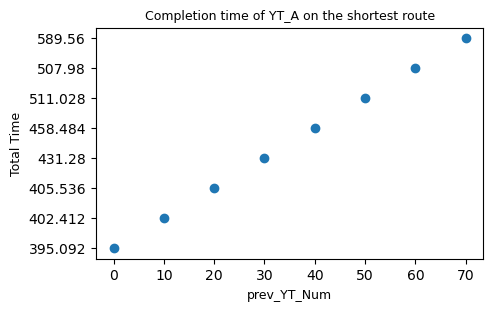

In [176]:
plt.figure(figsize=(5, 3))

plt.scatter(YT_A_shortest_df['prev YT Num'], YT_A_shortest_df['Total Time'])
plt.title('Completion time of YT_A on the shortest route', fontsize=9, ha='center')
plt.xlabel('prev_YT_Num', fontsize = 9)
plt.ylabel('Total Time', fontsize = 9)

plt.show()

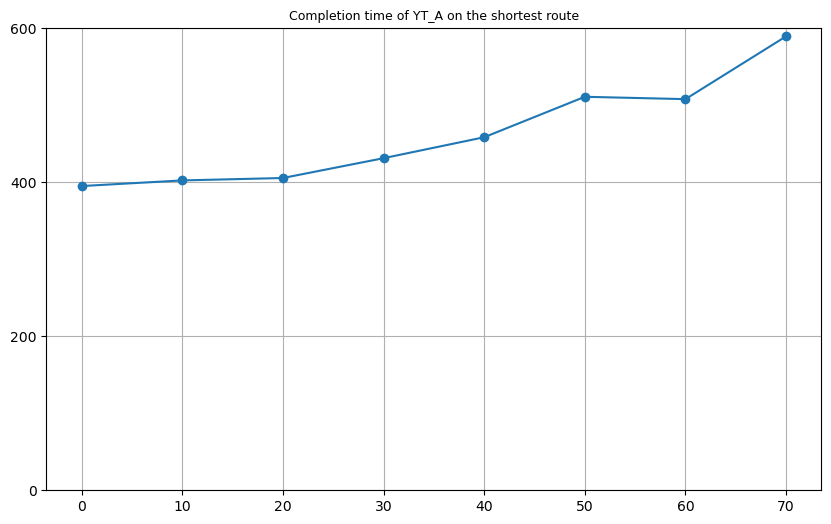

In [190]:
x_values = YT_A_shortest_df['prev YT Num']
y_values = YT_A_shortest_df['Total Time']

plt.figure(figsize=(10,6))
plt.plot(x_values, y_values , marker='o', linestyle='-')
plt.title('Completion time of YT_A on the shortest route', fontsize=9, ha='center')

plt.yticks(range(0, int(y_values.max()) + 200, 200))
# plt.xticks(range(0, x_values.max() + 10, 10))

plt.grid(True)
plt.show()

In [206]:
folder_name = 'variance_LP_tm'
variance_all_csv_data = load_csv_files_in_folder(folder_name)

# Printing the loaded CSV data for each file
keyword = "Truck-100"
YT_A_LP_data = []

for csv_file, csv_data in variance_all_csv_data:
    
    data = extract_YT_A_data(csv_data, keyword)
    
    # Extract the number after the first occurrence of "Truck"
    match  = re.search(r"Truck_(\d+)", csv_file)
    if match:
        truck_number = match.group(1)
        # prev 없을 때
        if truck_number == "1":
            truck_number = "0"
        print("prev Truck Number:", truck_number)
        print(f"Extracted data from {csv_file} where '{keyword}' exists:")
        for row in data:
            print(row)
            new_row = row + [truck_number] 
            YT_A_LP_data.append(new_row)
        print("=" * 80)
        
    else:
        print("Truck number not found.")

prev Truck Number: 0
Extracted data from result-now_Truck_1_LP_40_50_10.csv where 'Truck-100' exists:
['Truck-100', 'Route-100', '(175.0 0.0 155.5)', '(625.0 0.0 50.0)', '395.092', '61.388', '32.692']
prev Truck Number: 10
Extracted data from result-prev_Truck_10_shortest.csv-now_Truck_1_LP_40_50_10_with_10.csv where 'Truck-100' exists:
['Truck-100', 'Route-100', '(175.0 0.0 155.5)', '(625.0 0.0 50.0)', '401.46', '65.128', '35.312']
prev Truck Number: 20
Extracted data from result-prev_Truck_20_shortest.csv-now_Truck_1_LP_40_50_10_with_20.csv where 'Truck-100' exists:
['Truck-100', 'Route-100', '(175.0 0.0 155.5)', '(625.0 0.0 50.0)', '436.2', '99.68', '35.508']
prev Truck Number: 30
Extracted data from result-prev_Truck_30_shortest.csv-now_Truck_1_LP_40_50_10_with_30.csv where 'Truck-100' exists:
['Truck-100', 'Route-100', '(175.0 0.0 155.5)', '(625.0 0.0 50.0)', '433.04', '96.6', '35.432']
prev Truck Number: 40
Extracted data from result-prev_Truck_40_shortest.csv-now_Truck_1_LP_40_5

In [207]:
YT_A_LP_df = pd.DataFrame(YT_A_LP_data, columns = column_names)

YT_A_LP_df['Total Time'] = YT_A_LP_df['Total Time'].astype(float)
YT_A_LP_df

,Truck_id,Route_id,Origin,Destination,Total Time,PickupSta AT,DropSta AT,prev YT Num
0,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),395.092,61.388,32.692,0
1,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),401.460,65.128,35.312,10
2,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),436.200,99.68,35.508,20
3,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),433.040,96.6,35.432,30
4,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),464.360,127.78,35.572,40
5,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),469.236,132.608,35.624,40
6,Truck-100,Route-100,(175.0 0.0 155.5),(625.0 0.0 50.0),504.056,165.104,37.128,50
7,Truck-100,Route-100,(175.0 0.0 55.5),(125.0 0.0 200.0),418.676,82.648,34.904,60
8,Truck-100,Route-100,(425.0 0.0 155.5),(375.0 0.0 200.0),445.208,112.172,31.94,70


### shortest

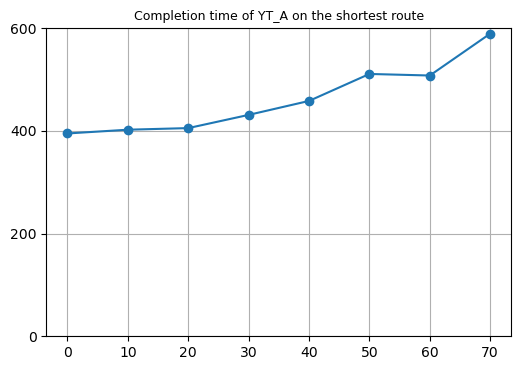

In [208]:
x_values = YT_A_shortest_df['prev YT Num']
y_values = YT_A_shortest_df['Total Time']

plt.figure(figsize=(6,4))
plt.plot(x_values, y_values , marker='o', linestyle='-')
plt.title('Completion time of YT_A on the shortest route', fontsize=9, ha='center')

plt.yticks(range(0, int(y_values.max()) + 200, 200))
# plt.xticks(range(0, x_values.max() + 10, 10))

plt.grid(True)
plt.show()

### LP_40_50_10

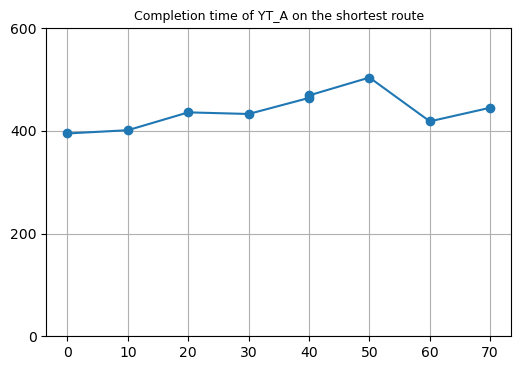

In [209]:
x_values = YT_A_LP_df['prev YT Num']
y_values = YT_A_LP_df['Total Time']

plt.figure(figsize=(6,4))
plt.plot(x_values, y_values , marker='o', linestyle='-')
plt.title('Completion time of YT_A on the shortest route', fontsize=9, ha='center')

plt.yticks(range(0, int(y_values.max()) + 200, 200))
# plt.xticks(range(0, x_values.max() + 10, 10))

plt.grid(True)
plt.show()

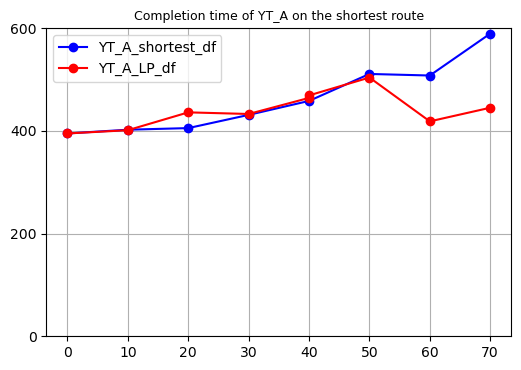

In [211]:
import matplotlib.pyplot as plt

# No. 1 data
x_values_1 = YT_A_shortest_df['prev YT Num']
y_values_1 = YT_A_shortest_df['Total Time']

# No. 2 data
x_values_2 = YT_A_LP_df['prev YT Num']
y_values_2 = YT_A_LP_df['Total Time']

plt.figure(figsize=(6, 4))

# Plotting No. 1 data with blue color
plt.plot(x_values_1, y_values_1, marker='o', linestyle='-', color='blue', label='YT_A_shortest_df')

# Plotting No. 2 data with red color
plt.plot(x_values_2, y_values_2, marker='o', linestyle='-', color='red', label='YT_A_LP_df')

plt.title('Completion time of YT_A on the shortest route', fontsize=9, ha='center')
plt.yticks(range(0, int(max(y_values_1.max(), y_values_2.max())) + 200, 200))
# plt.xticks(range(0, max(x_values_1.max(), x_values_2.max()) + 10, 10))

plt.grid(True)
plt.legend()  # Show legend with labels 'No. 1' and 'No. 2'
plt.show()
